# Support Vector Machine

### Basic Formulation
   $ f(x) = w^T x + b  = c $
  
   $ d(x) = \frac{w^T x + b}{||w||} $

### To scale all 
#### Set the upper bound of $ d(x) $ to 1 
    
   $ w^T x + b = 1 $
        
#### set the lower bound of $ d(x) $ to -1
    
   $ w^T x + b = -1 $ 
        
#### Then the margin is 
    
   $ w^T x + b = 0 $ 
   
#### The margin is $ \frac{1}{||w||} $
        
    

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # classifier algorithm
from sklearn import datasets

### Create a dataset

In [13]:
X,y = datasets.make_blobs(n_samples=100, # number of samples
                    n_features=2, # two dimension
                    centers=2, # two classes
                    # random_state = 370, # random seed
                    )
display(X.shape,y.shape)

(100, 2)

(100,)

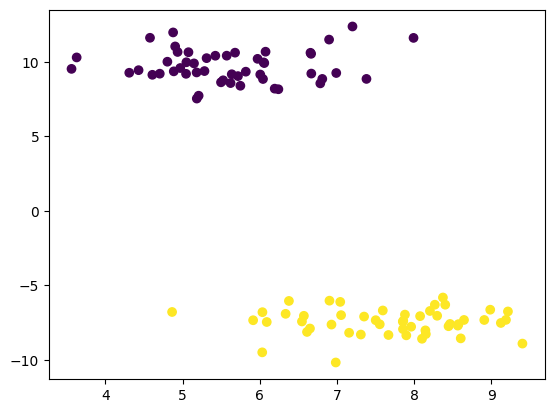

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Train the model

In [15]:
svc = SVC(kernel='linear') # linear kernel, which means the decision boundary is a line
svc.fit(X,y)

SVC(kernel='linear')

In [16]:
svc.score(X,y)

1.0

### Plot the decision boundary

In [17]:
svc.coef_,svc.intercept_

(array([[ 0.01682658, -0.14571963]]), array([0.01176943]))

In [18]:
w_ = svc.coef_  # w = [w1,w2]
b_ = svc.intercept_ # b

$f(x) = w_1*x1 + w_2*x2 + b = 0$

$x2 = -w_1/w_2 * x1 - b/w_2$

In [19]:
w = -w_[0,0]/w_[0,1]
b = -b_[0]/w_[0,1]

In [23]:
x_point = np.linspace(2.5,10.0,300)
y_liner = w*x_point + b

#### get support vectors

In [24]:
sv = svc.support_vectors_
sv

array([[ 5.18262127,  7.54166134],
       [ 8.37092107, -5.815019  ],
       [ 6.37603634, -6.04551864]])

#### plot the decision boundary, margin and support vectors, upper bound and lower bound

$ b = y - wx $

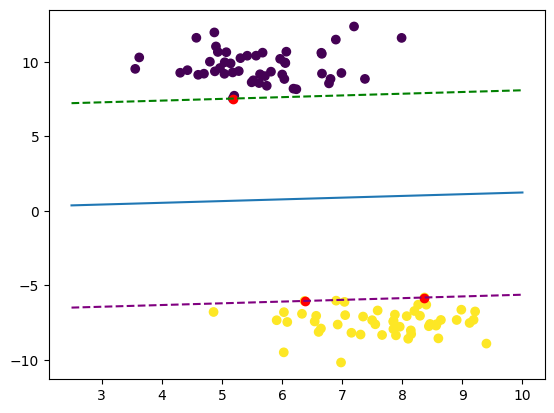

In [26]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_point,y_liner)

# plt.plot(x_point,y_liner+1/w_[0,1],'--')
# plt.plot(x_point,y_liner-1/w_[0,1],'--')

plt.scatter(sv[:,0],sv[:,1],c='red')

# upper bound and lower bound
b1 = sv[0][1] - w*sv[0][0]
b2 = sv[-1][1] - w*sv[-1][0]

plt.plot(x_point,w*x_point+b1,'--',c='green')
plt.plot(x_point,w*x_point+b2,'--',c='purple')

plt.show()